In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2024-boston-marathon-weather-and-splits/BQStandards.csv
/kaggle/input/2024-boston-marathon-weather-and-splits/Weather.csv
/kaggle/input/2024-boston-marathon-weather-and-splits/Athletes.csv


# **Loading dataset**

In [2]:
dataset = pd.read_csv('/kaggle/input/2024-boston-marathon-weather-and-splits/Athletes.csv')

# **Analysing the Dataset**

**Peeking into dataset**

In [3]:
dataset.head()

,Bib,Zip,Age,Age Group,Gender,First Half,Second Half,Finish,Positive Split,Percent Change
0,25,93730,30,Under 35,M,3832,3961,7793,129,0.033664
1,9,97124,32,Under 35,M,3845,4059,7904,214,0.055657
2,20,80922,40,40-44,M,3795,4157,7952,362,0.095389
3,46,2136,38,35-39,M,3997,4065,8062,68,0.017013
4,51,6119,26,Under 35,M,3979,4198,8177,219,0.055039


**Checking for any missing, null values**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17220 entries, 0 to 17219
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bib             17220 non-null  int64  
 1   Zip             17220 non-null  int64  
 2   Age             17220 non-null  int64  
 3   Age Group       17220 non-null  object 
 4   Gender          17220 non-null  object 
 5   First Half      17220 non-null  int64  
 6   Second Half     17220 non-null  int64  
 7   Finish          17220 non-null  int64  
 8   Positive Split  17220 non-null  int64  
 9   Percent Change  17220 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 1.3+ MB


**Totalcount, Mean, median, min values and max values of all columns**

In [5]:
dataset.describe()

,Bib,Zip,Age,First Half,Second Half,Finish,Positive Split,Percent Change
count,17220.000000,17220.000000,17220.000000,17220.000000,17220.000000,17220.000000,17220.000000,17220.000000
mean,15688.916783,38541.031127,42.217828,6526.240999,7587.674158,14113.915157,1061.433159,0.159734
std,8827.226766,34262.257821,12.540766,1270.014789,1779.232288,2960.045680,891.818242,0.130473
min,9.000000,627.000000,18.000000,3795.000000,3961.000000,7793.000000,-3677.000000,-0.369473
25%,7997.750000,3892.000000,32.000000,5575.000000,6266.000000,11923.750000,434.000000,0.071908
50%,15934.500000,29474.500000,42.000000,6284.000000,7210.000000,13505.500000,867.500000,0.133935
75%,23615.250000,75040.750000,51.000000,7242.250000,8701.000000,15973.000000,1466.000000,0.215936
max,30691.000000,99835.000000,82.000000,12057.000000,17096.000000,25866.000000,9810.000000,1.541497


Athletes are from a wide range of Age from as young as 18 years old to as old as 82 year old.

The Athletes are pretty quick and well experienced in marathons, they completed both halves in almost 1 hour.

**Seperating independent variables and the target variable**

In [6]:
X = dataset.loc[:, ['First Half', 'Second Half']]

In [7]:
y = dataset.loc[:,'Age']

In [8]:
import seaborn as sns

**Checking the correlation between independent variables and the target variable**

In [9]:
dataset[['First Half', 'Second Half', 'Age']].corr()

,First Half,Second Half,Age
First Half,1.000000,0.881389,0.237932
Second Half,0.881389,1.000000,0.234699
Age,0.237932,0.234699,1.000000


First and Second Half do not have a strong correlation with the target variable 'Age'

**Using Distribution plots and scatter plots to find the relationship between variables**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


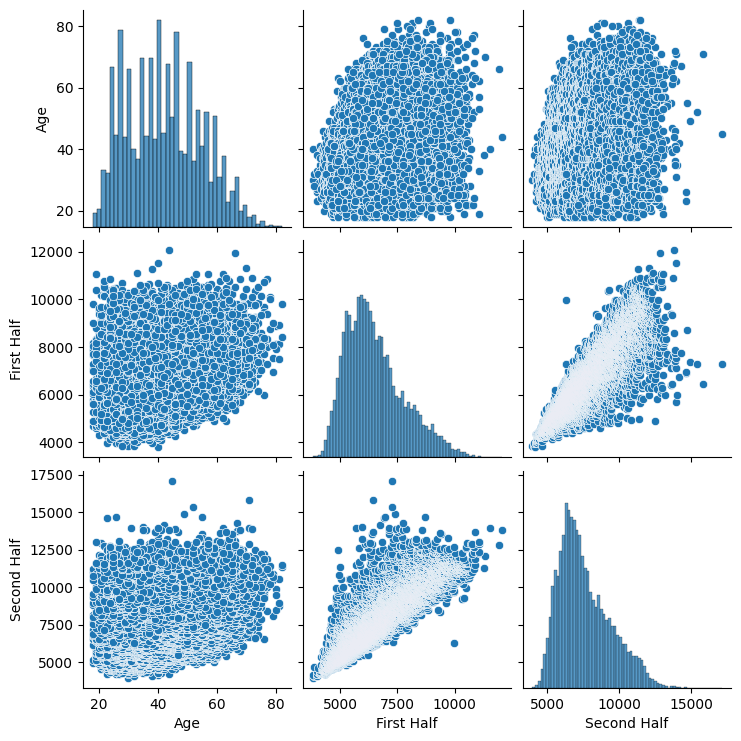

In [10]:
sns.pairplot(dataset[['Age', 'First Half', 'Second Half']])

The First and Second Half columns distribution is right skewed.

We cannot observe a perfect linear realtionship between First, Second Half and Age columns.

# **Model Building**

**Splitting the dataset into training and testing sets**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

**Using Linear Regression Model**

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_pred = lr.predict(X_test)

print('MAE:', mean_absolute_error(y_test,lr_pred))
print('MSE:', mean_squared_error(y_test,lr_pred))
print('R-Squared:', r2_score(y_test,lr_pred))

MAE: 10.275231219868001
MSE: 152.3445266201889
R-Squared: 0.06069760548332659


As we did not see any linear relationship between variables, we will try other models which capture the non-linear relationship between the independent features and the label

**Random Forest Regressor**

We will use GridSearchCV to obtain the better hyperparameters for the RandomForestRegressor model

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [3, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',verbose=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...max_depth=3, n_estimators=10;, score=-132.397 total time=   0.1s
[CV 2/5] END ...max_depth=3, n_estimators=10;, score=-131.127 total time=   0.1s
[CV 3/5] END ...max_depth=3, n_estimators=10;, score=-131.021 total time=   0.1s
[CV 4/5] END ...max_depth=3, n_estimators=10;, score=-140.853 total time=   0.1s
[CV 5/5] END ...max_depth=3, n_estimators=10;, score=-137.256 total time=   0.1s
[CV 1/5] END ...max_depth=3, n_estimators=20;, score=-132.154 total time=   0.2s
[CV 2/5] END ...max_depth=3, n_estimators=20;, score=-131.202 total time=   0.2s
[CV 3/5] END ...max_depth=3, n_estimators=20;, score=-131.253 total time=   0.2s
[CV 4/5] END ...max_depth=3, n_estimators=20;, score=-141.386 total time=   0.2s
[CV 5/5] END ...max_depth=3, n_estimators=20;, score=-137.567 total time=   0.2s
[CV 1/5] END ...max_depth=3, n_estimators=50;, score=-132.258 total time=   0.4s
[CV 2/5] END ...max_depth=3, n_estimators=50;, sc

In [15]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)

RandomForestRegressor(max_depth=5, n_estimators=50)
-133.77094179453556


So the best hyperparameters for RF model are
max_depth=5 and n_estimators=50

In [16]:
best_model.feature_importances_

array([0.90356187, 0.09643813])

'First Half' contributes 90% and 'Second Half' contributes 10% for the prediction of target varible 

**XGB Regressor**

As Extreme Gradient Boosting Algorithms are state of the art machine learning algorithms, we can use them for task of predicting 'Age'

In [17]:
from xgboost import XGBRegressor

In [18]:

xgb_model_ =  XGBRegressor()
param_grid_2 = {
    'n_estimators': [20,60,75],
    'max_depth': [3,5,6],
    'learning_rate': [0.01, 0.1, 0.13],
}

grid_search_2 = GridSearchCV(estimator=xgb_model_, param_grid=param_grid_2, cv=5, scoring='neg_mean_squared_error',verbose=3)
grid_search_2.fit(X_train, y_train)

best_model_2 = grid_search_2.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=20;, score=-148.218 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=20;, score=-145.074 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=20;, score=-146.645 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=20;, score=-155.301 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=20;, score=-150.253 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=60;, score=-139.905 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=60;, score=-137.420 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=60;, score=-138.410 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=60;, score=-147.345 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimato

In [19]:
print(grid_search_2.best_estimator_)
print(grid_search_2.best_score_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.13, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=60, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
-133.5397864953987


So the best hyperparameters for XGB model are max_depth=3 and n_estimators=60

In [20]:
best_model_2.feature_importances_

array([0.87542135, 0.12457868], dtype=float32)

'First Half' contributes 88% and 'Second Half' contributes 12% for the prediction of target varible

# **Prediction on the test set**

As both Rf and XGB models performed equally on the training set, I am testing both the models on the test set

**Prediction by RF model**

In [21]:
final_pred_rf = best_model.predict(X_test)

print("Final MAE:", mean_absolute_error(y_test, final_pred_rf))
print("Final MSE:", mean_squared_error(y_test, final_pred_rf))
print("Final R-squared:", r2_score(y_test, final_pred_rf))

Final MAE: 9.62241004399093
Final MSE: 138.99648567958167
Final R-squared: 0.14299689838064966


**Prediciton by XGB model**

In [22]:
final_pred_xgb = best_model_2.predict(X_test)

print("Final MAE:", mean_absolute_error(y_test, final_pred_xgb))
print("Final MSE:", mean_squared_error(y_test, final_pred_xgb))
print("Final R-squared:", r2_score(y_test, final_pred_xgb))

Final MAE: 9.616328873562342
Final MSE: 138.88450400665494
Final R-squared: 0.14368733771480635


# **Conclusion**

As we can see XGB model performed slightly better than the RF model. As XGB is a powerful machine learning algorithm known for its efficiency, and speed, it may have outperformed Random forest ever so slightly.

**The final scores of the best regression model are:**

Final MAE: 9.616328873562342

Final MSE: 138.88450400665494

Final R-squared: 0.14368733771480635